In [2]:
import elephant
import neo
from scipy import io
import scipy
import numpy as np
import random
import quantities as pq
import matplotlib.pyplot as plt

In [3]:
spktime_e = scipy.io.loadmat("test_e_spktime.mat")
len(spktime_e['spktime_e'].T[0])

100000

In [4]:
spkidx_e = scipy.io.loadmat("test_e_spkindx.mat")
spkidx_e["spkindex_e"].T[0]

array([ 35, 175, 470, ...,   0,   0,   0], dtype=uint16)

In [4]:
neuron_uq = np.unique(spkidx_e["spkindex_e"].T[0])[1:]

In [5]:
len(neuron_uq)

217

In [6]:
binsize = 50 * pq.ms
num_neurons = 100

In [1]:
sample_neurons = random.sample(list(neuron_uq),num_neurons)
neo_spiketrains = list()
for s in sample_neurons:

    neuron_idx = np.where(spkidx_e["spkindex_e"].T[0] == s)[0]

    spk = np.take(spktime_e['spktime_e'].T[0], neuron_idx)

    neo_spk = neo.SpikeTrain(spk * pq.ms, t_stop=2000)
    
    print(neo_spk)
    
    neo_spiketrains.append(neo_spk)

binned_spk = elephant.conversion.BinnedSpikeTrain(neo_spiketrains, binsize=binsize)


corr = elephant.spike_train_correlation.corrcoef(binned_spk)
    
    

NameError: name 'random' is not defined

In [8]:
only_interactions = corr.ravel()[corr.ravel() != 1.]

(array([ 196., 7426.,  410.,  422.,  280.,  182.,  128.,  194.,   34.,
          43.]),
 array([-0.28182646, -0.15364381, -0.02546117,  0.10272148,  0.23090412,
         0.35908677,  0.48726942,  0.61545206,  0.74363471,  0.87181735,
         1.        ]),
 <BarContainer object of 10 artists>)

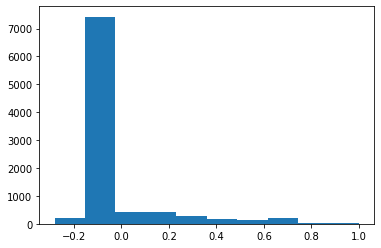

In [9]:
plt.hist(only_interactions)

/Users/jofrony/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

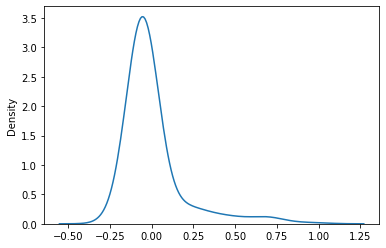

In [10]:
import seaborn as sns
sns.kdeplot(np.array(only_interactions), bw=0.5)

In [11]:
np.mean(np.array(only_interactions))

0.005748770990629287

In [12]:
from analysis import rate_per_neuron

In [13]:
rates = rate_per_neuron(spkidx_e["spkindex_e"],spktime_e['spktime_e'], duration=2000)

(array([120.,  24.,  18.,   9.,   6.,   6.,   3.,   5.,   3.,   0.,   3.,
          2.,   0.,   0.,   6.,   0.,   2.,   1.,   1.,   1.,   0.,   1.,
          0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.5 ,  1.39,  2.28,  3.17,  4.06,  4.95,  5.84,  6.73,  7.62,
         8.51,  9.4 , 10.29, 11.18, 12.07, 12.96, 13.85, 14.74, 15.63,
        16.52, 17.41, 18.3 , 19.19, 20.08, 20.97, 21.86, 22.75, 23.64,
        24.53, 25.42, 26.31, 27.2 , 28.09, 28.98, 29.87, 30.76, 31.65,
        32.54, 33.43, 34.32, 35.21

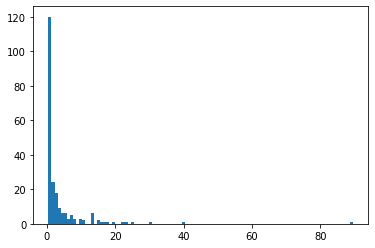

In [17]:
plt.hist(rates, bins=100)

In [15]:
rates 

[0.5,
 30.5,
 2.0,
 3.0,
 13.5,
 0.5,
 1.0,
 1.5,
 0.5,
 2.0,
 0.5,
 0.5,
 0.5,
 7.5,
 0.5,
 1.5,
 0.5,
 2.5,
 1.0,
 0.5,
 17.5,
 0.5,
 3.5,
 0.5,
 3.0,
 0.5,
 0.5,
 13.0,
 0.5,
 10.5,
 0.5,
 2.0,
 4.0,
 0.5,
 0.5,
 0.5,
 15.0,
 1.0,
 1.0,
 10.5,
 5.0,
 1.0,
 3.0,
 0.5,
 0.5,
 7.5,
 2.0,
 0.5,
 2.5,
 0.5,
 0.5,
 1.5,
 1.0,
 0.5,
 1.0,
 1.0,
 8.0,
 0.5,
 0.5,
 0.5,
 8.0,
 19.5,
 0.5,
 0.5,
 0.5,
 1.5,
 15.0,
 0.5,
 13.5,
 0.5,
 1.0,
 0.5,
 1.0,
 1.0,
 0.5,
 4.5,
 0.5,
 9.5,
 0.5,
 4.5,
 0.5,
 2.0,
 0.5,
 17.0,
 9.5,
 0.5,
 0.5,
 0.5,
 3.0,
 0.5,
 2.5,
 13.0,
 4.5,
 1.5,
 1.5,
 0.5,
 4.5,
 1.5,
 0.5,
 3.0,
 6.0,
 5.5,
 1.0,
 0.5,
 0.5,
 0.5,
 0.5,
 1.5,
 1.0,
 0.5,
 1.0,
 2.5,
 0.5,
 16.0,
 23.0,
 0.5,
 2.0,
 1.0,
 4.0,
 2.0,
 0.5,
 0.5,
 4.5,
 3.0,
 1.0,
 13.0,
 3.0,
 40.0,
 3.0,
 0.5,
 0.5,
 22.0,
 0.5,
 3.0,
 0.5,
 0.5,
 1.5,
 0.5,
 1.0,
 5.5,
 0.5,
 0.5,
 9.5,
 0.5,
 0.5,
 13.0,
 5.5,
 4.5,
 1.0,
 2.0,
 0.5,
 7.0,
 0.5,
 4.0,
 0.5,
 0.5,
 7.0,
 1.5,
 1.5,
 5.0,
 0.5,
 5.0,
 1.0,
 1.0